## Analysis and comparisons

Number of price outliers: 0


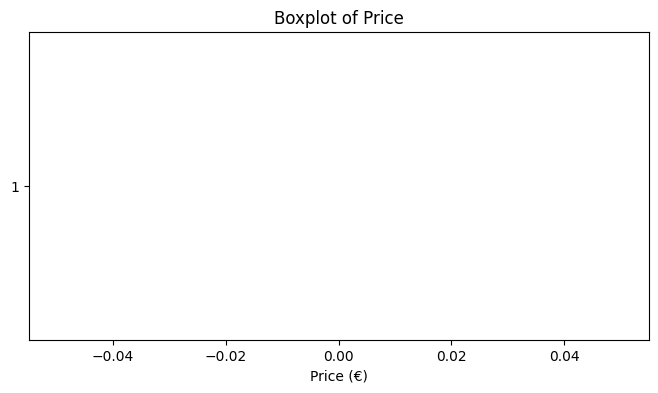

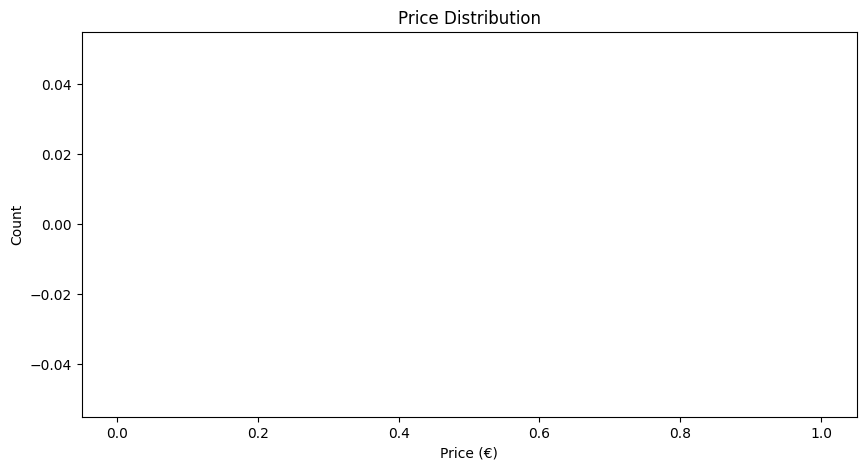

region
brussels   NaN
flanders   NaN
unknown    NaN
wallonia   NaN
Name: price, dtype: float64

In [16]:
import matplotlib.pyplot as plt
# Ensure price is numeric

df["price"] = pd.to_numeric(df["price"], errors="coerce")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print("Number of price outliers:", len(outliers))
outliers.head()

plt.figure(figsize=(8,4))
plt.boxplot(df["price"].dropna(), vert=False)
plt.title("Boxplot of Price")
plt.xlabel("Price (€)")
plt.show()


#Identify outliers visually using a histogram

plt.figure(figsize=(10,5))
plt.hist(df["price"].dropna(), bins=60)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

# separate for outliers



# Extract outliers into a separate DataFrame
price_outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

# Show number of outliers
#print("Number of price outliers:", len(price_outliers))

# Display the first few outliers
#price_outliers.head()



#correlation
df.corr(numeric_only=True)["price"].sort_values(ascending=False)   # correlation of Price

# add regions
def postal_to_region(code):
    if pd.isna(code):
        return "unknown"
    if 1000 <= code <= 1299:
        return "brussels"
    if (1300 <= code <= 1499) or (4000 <= code <= 7999):
        return "wallonia"
    if (1500 <= code <= 3990) or (8000 <= code <= 9992):
        return "flanders"
    return "unknown"
    
df["region"] = df["postal_code"].apply(postal_to_region)
price_outliers
df.groupby("region")["price"].median()
#df.isna().sum()



## data distributions


# global price distribution


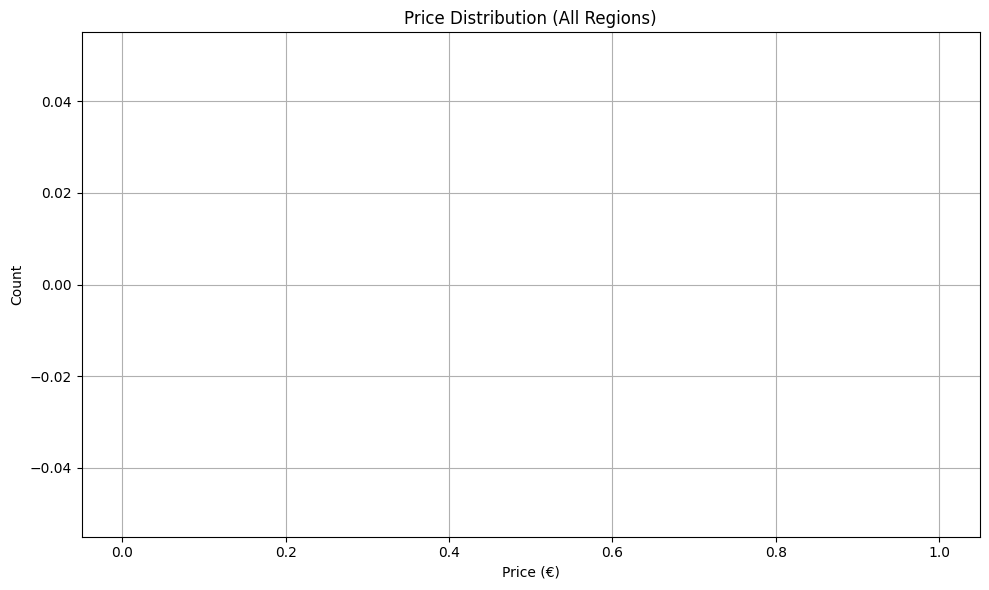

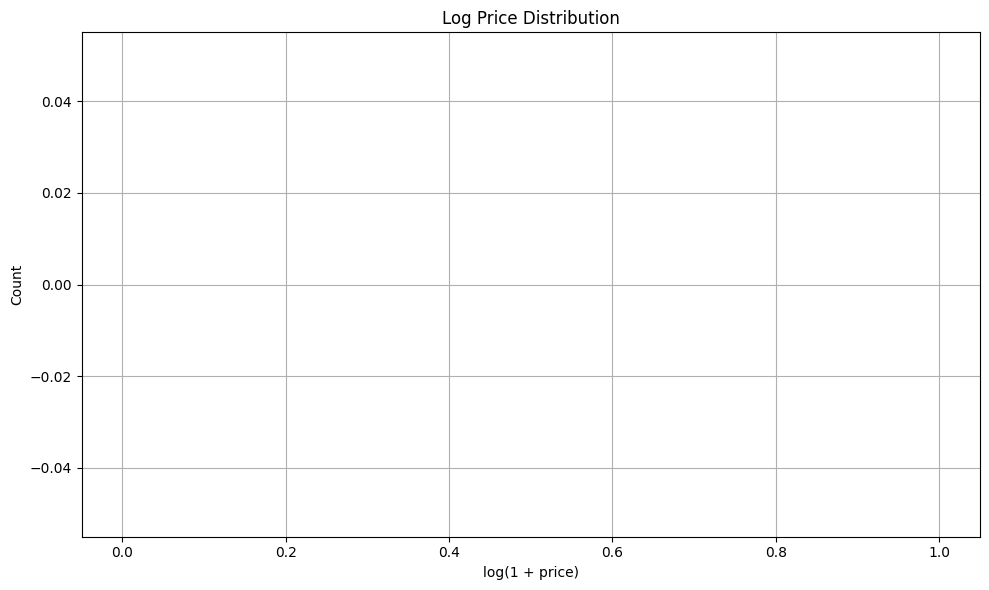

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df["price"].hist(bins=80)
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution (All Regions)")
plt.tight_layout()
plt.show()
# 
import numpy as np

plt.figure(figsize=(10,6))
np.log1p(df["price"]).hist(bins=80)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.title("Log Price Distribution")
plt.tight_layout()
plt.show()


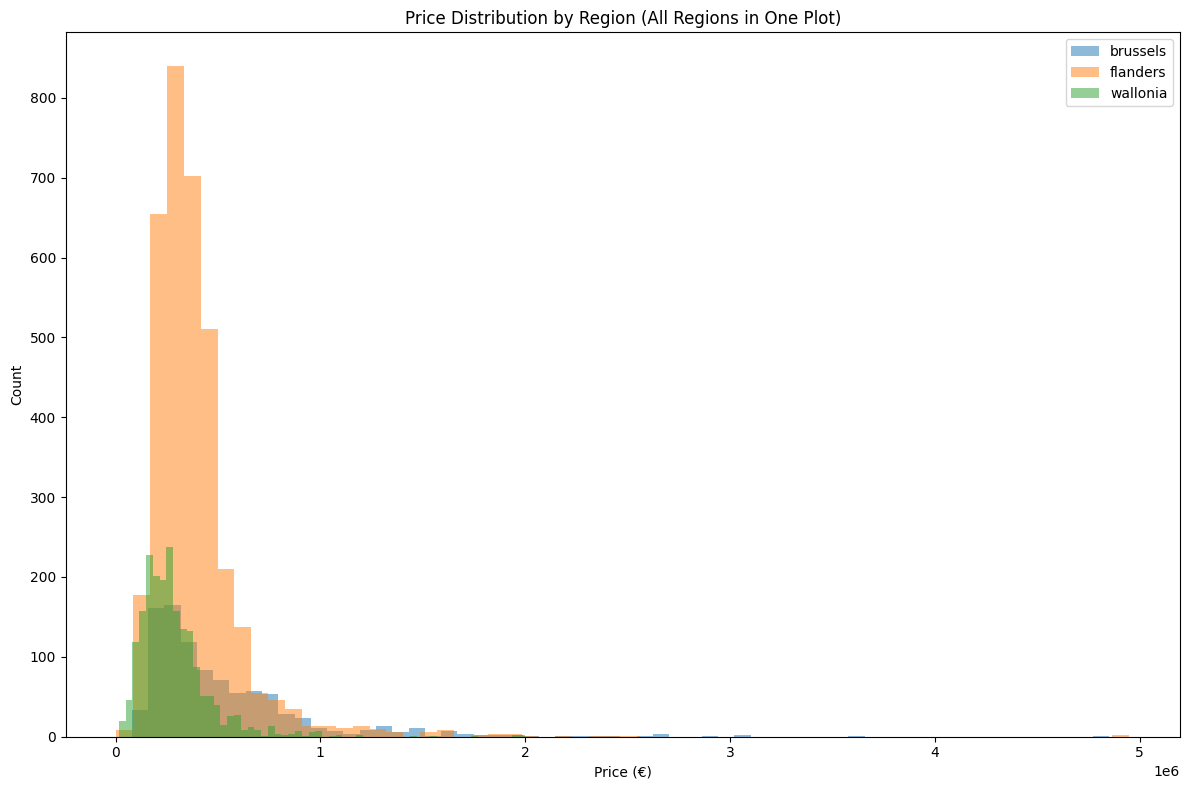

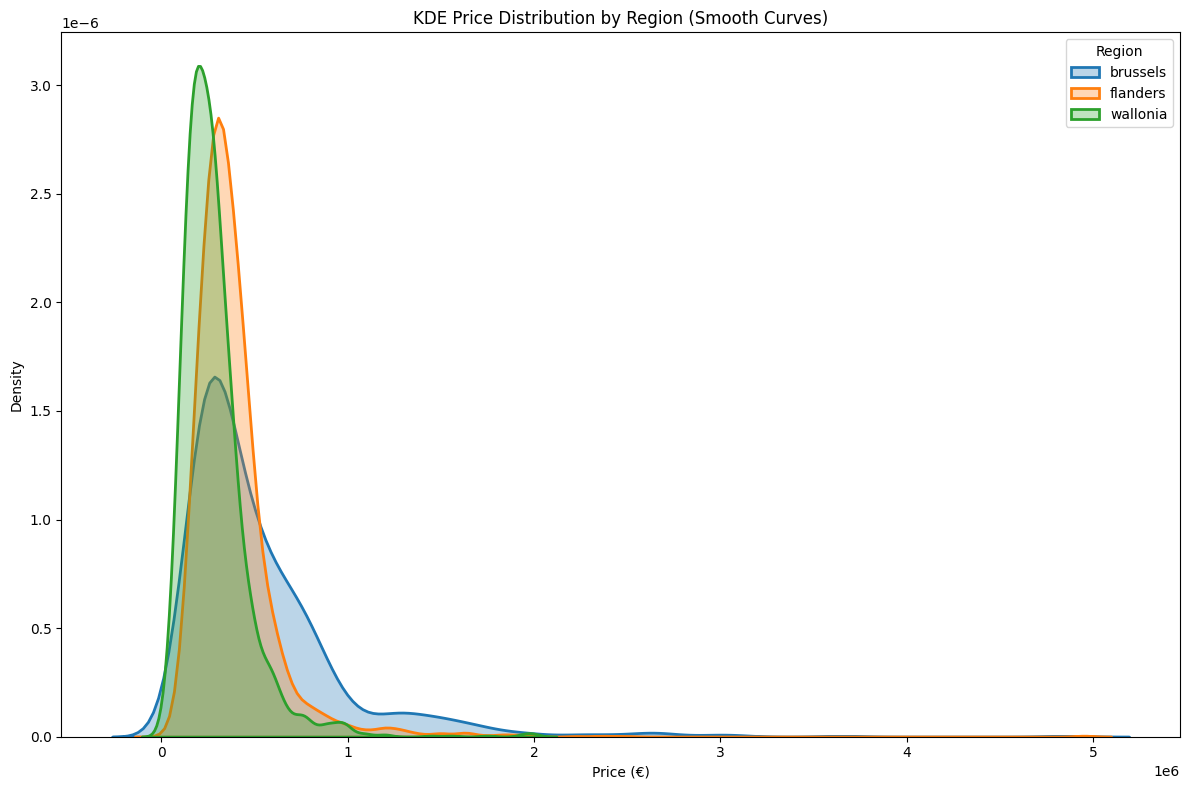

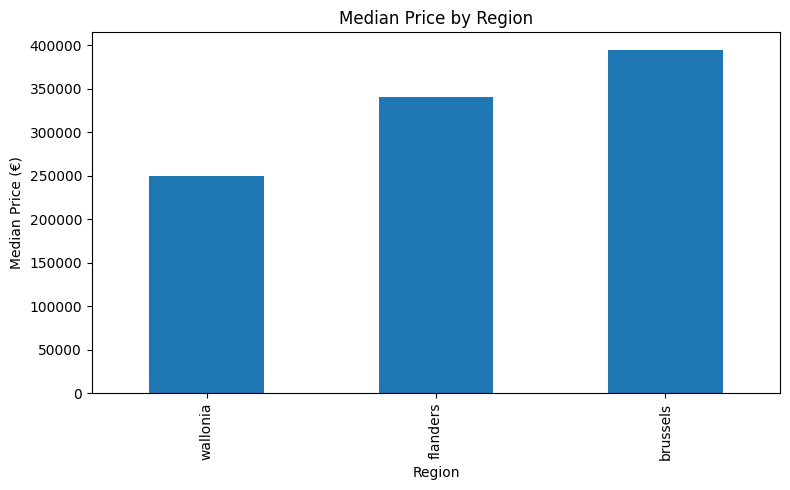

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["price"].notna() & (df["price"] > 0)]


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

# Get regions with valid price data
regions = df_valid["region"].dropna().unique()

plt.figure(figsize=(12,8))

# Loop and plot all price distributions in one histogram
for region in regions:
    subset = df_valid[df_valid["region"] == region]["price"]
    if subset.dropna().empty:
        continue
    plt.hist(subset, bins=60, alpha=0.5, label=region)

plt.title("Price Distribution by Region (All Regions in One Plot)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

#KDE


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid positive prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

plt.figure(figsize=(12,8))

# Plot KDE for each region
for region in df_valid["region"].dropna().unique():
    sns.kdeplot(
        df_valid[df_valid["region"] == region]["price"],
        label=region,
        fill=True,
        alpha=0.3,
        linewidth=2
    )

plt.title("KDE Price Distribution by Region (Smooth Curves)")
plt.xlabel("Price (€)")
plt.ylabel("Density")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#by median
median_price = df.groupby("region")["price"].median().sort_values()

median_price.plot(kind="bar", figsize=(8,5))
plt.title("Median Price by Region")
plt.xlabel("Region")
plt.ylabel("Median Price (€)")
plt.tight_layout()
plt.show()




# <B> DELIVERABLES

## load the data and setting the libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  # clean default style
df = pd.read_csv("data.csv")   #loading the dataset
df.head()
df = df.copy()




## 1) How many observations and features/columns do you have?

In [317]:
# Number of rows (observations) and columns (features)
n_rows, n_cols = df.shape
print(f"Observations: {n_rows}, Features: {n_cols}")

# Quick structural overview
df.info()


Observations: 15232, Features: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15232 entries, 0 to 15231
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   build_year          6226 non-null   object 
 1   facades             10088 non-null  float64
 2   garden              15232 non-null  object 
 3   living_area         13504 non-null  object 
 4   locality_name       15012 non-null  object 
 5   number_rooms        13980 non-null  object 
 6   postal_code         15008 non-null  float64
 7   price               14389 non-null  float64
 8   property_id         15232 non-null  object 
 9   property_type       14236 non-null  object 
 10  property_url        15232 non-null  object 
 11  state               11116 non-null  object 
 12  swimming_pool       15232 non-null  object 
 13  terrace             13832 non-null  object 
 14  province            15008 non-null  object 
 15  property_type_name 

# 2) What is the proportion of missing values per column?

In [318]:
# missing count + percentage
missing_counts = df_clean.isna().sum()
missing_prop = (missing_counts / len(df_clean) * 100).round(1)
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_%": missing_prop
}).sort_values("missing_%", ascending=False)
missing_summary


#




,missing_count,missing_%
build_year,8786,58.5
facades,4922,32.8
state_mapped,3898,26.0
state,3898,26.0
price_per_m2,2112,14.1
living_area,1510,10.1
terrace,1182,7.9
number_rooms,1034,6.9
property_type,778,5.2
property_type_name,778,5.2


In [319]:
# Visualization missing values
ax = missing_summary["missing_pct"].plot(
    kind="bar",
    figsize=(10,5)
)

plt.ylabel("% Missing")
plt.title("Proportion of Missing Values per Column")
plt.tight_layout()

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",                               # format percentage
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()



KeyError: 'missing_pct'

## missing heatmap

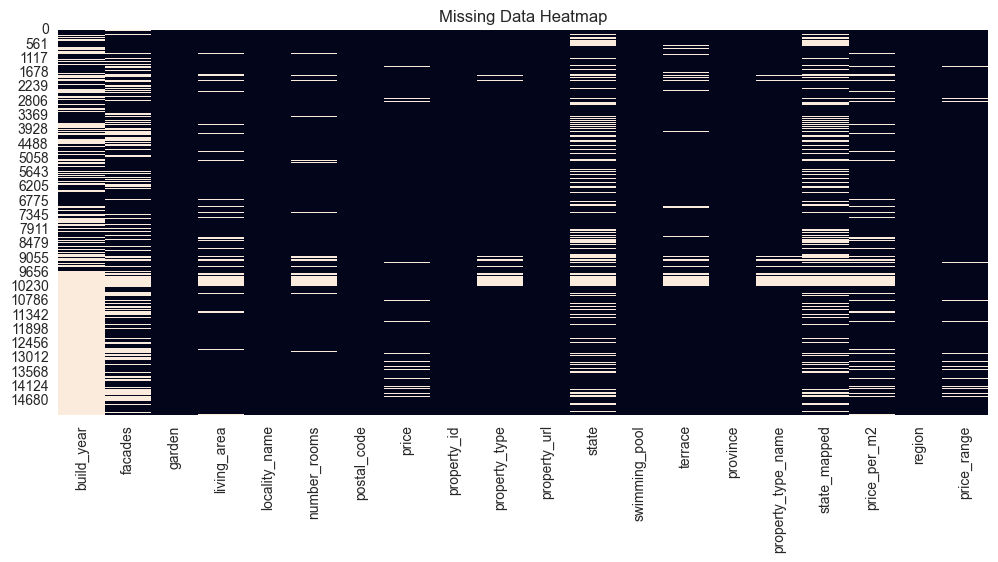

In [320]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(df_clean.isna(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


<b> Remarks: While certain variables, like build_year, facades, and state, have significant missingness, others, like pricing and property_id  have relatively little incomplete data.

#  ----------------data cleaning -------------

In [350]:

# Start from your original df
df_clean = df.copy()

# 1) Remove exact duplicate rows
df_clean = df_clean.drop_duplicates()

# 2) Strip leading/trailing spaces in all text columns
obj_cols = df_clean.select_dtypes(include="object").columns

for col in obj_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.strip()                    # " I love python " -> "I love python"
        .replace({"": np.nan,           # empty string -> NaN
                  "nan": np.nan,
                  "None": np.nan})
    )

# 3) Force numeric columns to be real numbers, set wrong encodings to NaN
numeric_like = [
    "build_year", "facades", "garden", "living_area",
    "number_rooms", "price",
    "swimming_pool", "terrace"
]

for col in numeric_like:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")
        # Any text like "abc" in these columns becomes NaN

# 4) Derive useful features
df_clean["price_per_m2"] = df_clean["price"] / df_clean["living_area"]


df_clean["postal_code"] = df_clean["postal_code"].astype("string")


# Map provinces to regions (Belgium / Wallonia / Flanders / Brussels)

def map_region(province):
    if pd.isna(province):
        return np.nan
    if province in ["Antwerp", "Limburg", "East Flanders", "West Flanders", "Flemish Brabant"]:
        return "Flanders"
    if province in ["Walloon Brabant", "Hainaut", "Liège", "Namur", "Luxembourg"]:
        return "Wallonia"
    if province == "Brussels Capital Region":
        return "Brussels"
    return np.nan

# Convert blank strings to NaN
df_clean["province"] = df_clean["province"].replace("", pd.NA)

# Remove rows with no province
df_clean = df_clean[df_clean["province"].notna()].copy()

# Map province → region
df_clean["region"] = df_clean["province"].apply(map_region)


cols_to_drop = ["property_id"]
df_model = df_clean.drop(columns=cols_to_drop)


# removing outliers of price and living area

# STEP 1 — Ensure numeric columns
df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")
df_clean["living_area"] = pd.to_numeric(df_clean["living_area"], errors="coerce")

# STEP 2 — IQR Outlier Removal Function
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# STEP 3 — Remove outliers for both PRICE and LIVING AREA
df_no_outliers = df_clean.copy()
df_no_outliers = remove_outliers_iqr(df_no_outliers, "price")
df_no_outliers = remove_outliers_iqr(df_no_outliers, "living_area")

#reemove the bottom boundary price which are not real
# Remove properties below 20,000 €
df_clean = df_clean[df_clean["price"] >= 20000].copy()


# Result shape check
df_no_outliers.shape






(11514, 19)

# 3) Which variables would you delete and why?

#### URL , property_id(postal_code???) because they are identifiers,not explanatory variables. they are unique and useful for tracking but not for the price.  inaddition we want to remove furnished, equipped_kitchen and garden_area due to their relevance and mostly missing data

In [351]:
# Columns where almost all values are unique 
high_card = df.nunique().sort_values(ascending=False)
high_card

# Columns with (almost) constant values
low_var = df.nunique().sort_values()
low_var

state_mapped              2
garden                    3
property_type_name        3
swimming_pool             3
terrace                   3
facades                   4
state                    10
province                 11
property_type            23
number_rooms             28
build_year              182
living_area             795
postal_code             853
locality_name          1372
price                  2336
property_url          15229
property_id           15229
dtype: int64

 # 4) What variables are most subject to outliers?

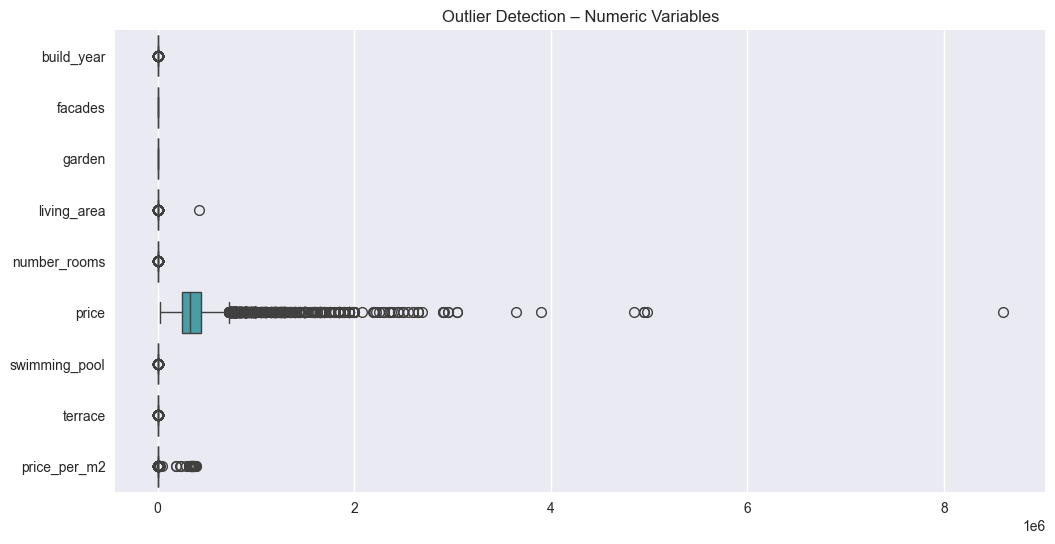

In [352]:
# numeric summary
numeric = df_clean.select_dtypes(include="number").columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[numeric], orient="h")
plt.title("Outlier Detection – Numeric Variables")
plt.show()





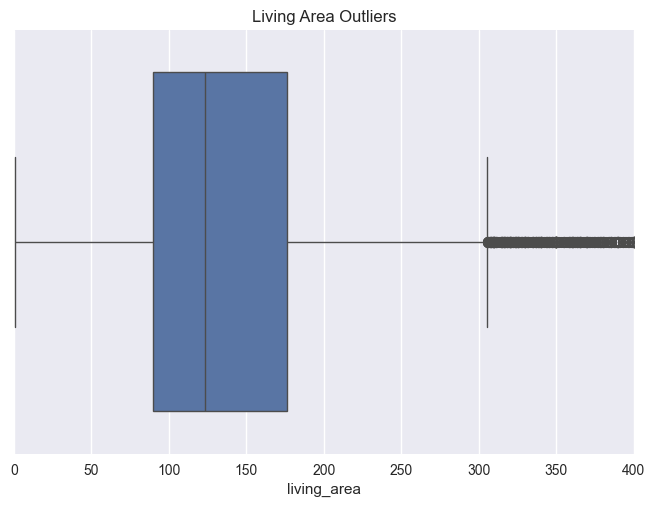

In [353]:
# boxplots
sns.boxplot(x=df_clean["living_area"])
plt.xlim(0, 400)  # hide insane outliers for clarity
plt.title("Living Area Outliers")
plt.show()






<b>          Which variables have few or no outliers?

- Facades (0–4 typical range)

- Terrace, garden, swimming_pool, furnished, equipped_kitchen (binary variables)

- These do not produce outliers because their range is fixed.

# 5. How many qualitative and quantitative variables? Visuals and correlation measures?

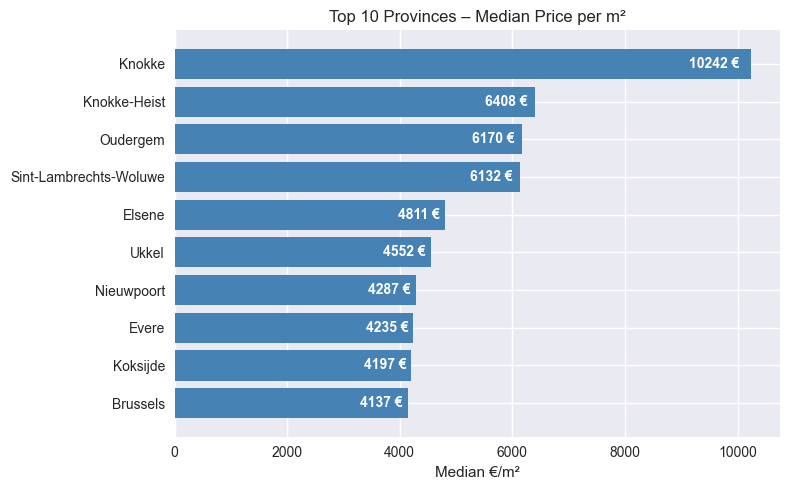

In [354]:
# Qualitative (categorical)

values = top10["median_price_m2"]
labels = top10.index

plt.figure(figsize=(8,5))
bars = plt.barh(labels, values, color="steelblue")
plt.title("Top 10 Provinces – Median Price per m²")
plt.xlabel("Median €/m²")
plt.gca().invert_yaxis()

# ADD PERCENTILE LABELS INSIDE EACH BAR
for bar, val in zip(bars, values):
    width = bar.get_width()
    plt.text(
        width * 0.98,                         # horizontal position (inside bar)
        bar.get_y() + bar.get_height() / 2,   # vertical centering
        f"{val:.0f} €",                        # label text
        ha="right", va="center", color="white", fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.show()



# 6. What is the correlation between variables and price?

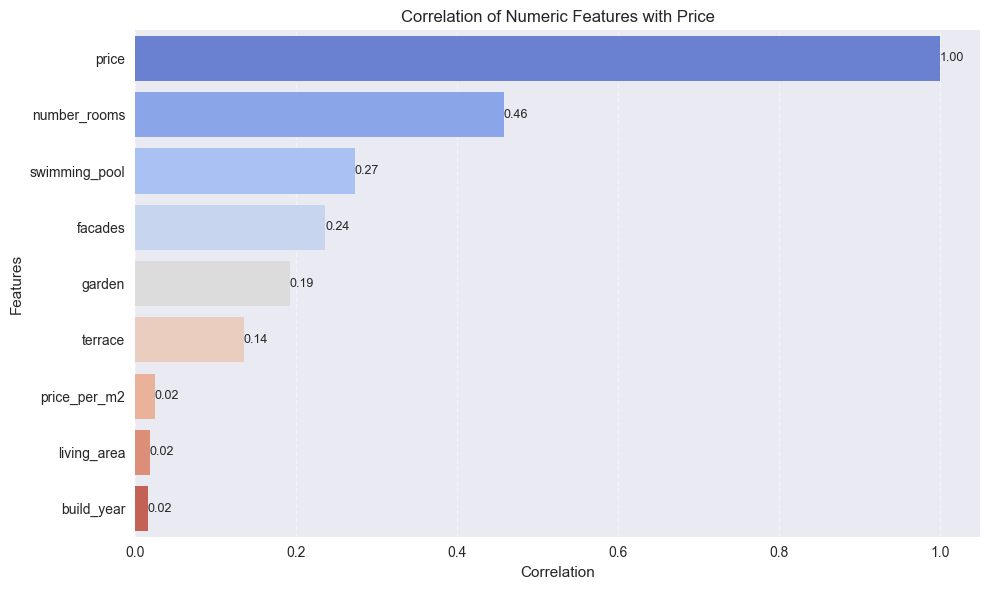

In [355]:
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()

# Ensure price_per_m2 is included
if "price_per_m2" not in numeric_cols:
    numeric_cols.append("price_per_m2")

# Compute correlations with price
corr_with_price = (
    df_clean[numeric_cols]
    .corr()["price"]
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=corr_with_price.values,
    y=corr_with_price.index,
    hue=corr_with_price.index,   # fix
    palette="coolwarm",
    dodge=False,
    legend=False
)

plt.title("Correlation of Numeric Features with Price")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Add correlation labels
for i, value in enumerate(corr_with_price.values):
    ax.text(
        value,
        i,
        f"{value:.2f}",
        va="center",
        ha="left" if value > 0 else "right",
        fontsize=9
    )

plt.tight_layout()
plt.show()


<b> Larger properties are typically more expensive, as seen by the significant correlation between price and living area and number of rooms. Geographical factors like postal code and location can have a big impact on prices. Because they are less common and frequently found in particular house types and upscale properties, things like gardens, terraces, and pools have a favorable but more limited impact. 


<b> We find that the number of rooms and living area have a high correlation, establishing a size-related group of variables that together represent the property's physical volume. Price per square meter and location factors also frequently correlate, particularly within a given region. Another minor correlation group that is typical of higher-end residences is formed by the likelihood of amenities like a garden, terrace, and swimming pool to co-occur.

### catagorical variables

# Anaysis by municipality

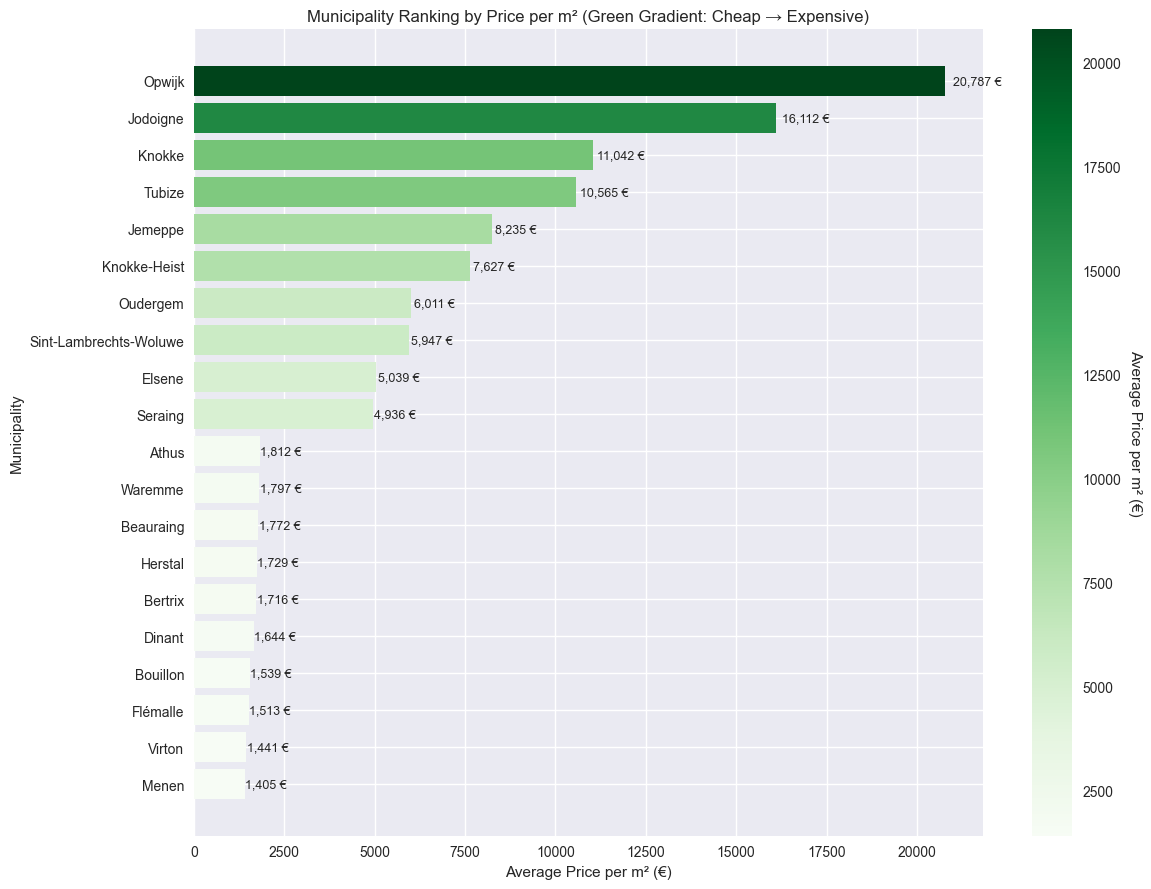

In [356]:
# Municipality price ranking by mean


# Filter only municipalities with enough listings (≥ 20)
muni_stats = muni_stats[muni_stats["count"] >= 20].copy()

# Top expensive per m²
top_m2 = muni_stats.sort_values("avg_m2", ascending=False).head(10)

# Cheap per m²
low_m2 = muni_stats.sort_values("avg_m2", ascending=True).head(10)

top_m2, low_m2


# Combine
plot_df = pd.concat([low_m2, top_m2], ignore_index=True)
plot_df = plot_df.sort_values("avg_m2", ascending=True)
plot_df["label"] = plot_df["locality_name"]

# Normalize 0–1 for gradient
norm = (plot_df["avg_m2"] - plot_df["avg_m2"].min()) / (plot_df["avg_m2"].max() - plot_df["avg_m2"].min())
colors = plt.cm.Greens(norm)

# Create figure + axis explicitly
fig, ax = plt.subplots(figsize=(12, 9))

bars = ax.barh(
    y=plot_df["label"],
    width=plot_df["avg_m2"],
    color=colors
)

ax.set_title("Municipality Ranking by Price per m² (Green Gradient: Cheap → Expensive)")
ax.set_xlabel("Average Price per m² (€)")
ax.set_ylabel("Municipality")

# Numeric labels
for bar in bars:
    v = bar.get_width()
    ax.text(
        v + (v * 0.01),
        bar.get_y() + bar.get_height() / 2,
        f"{v:,.0f} €",
        va="center",
        fontsize=9
    )

# Proper colorbar linking
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

norm_obj = Normalize(vmin=plot_df["avg_m2"].min(), vmax=plot_df["avg_m2"].max())
sm = ScalarMappable(norm=norm_obj, cmap="Greens")
sm.set_array([])  # required for colorbar

# Attach colorbar to the correct axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Average Price per m² (€)", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()






## Least/most expensive municipalities by median

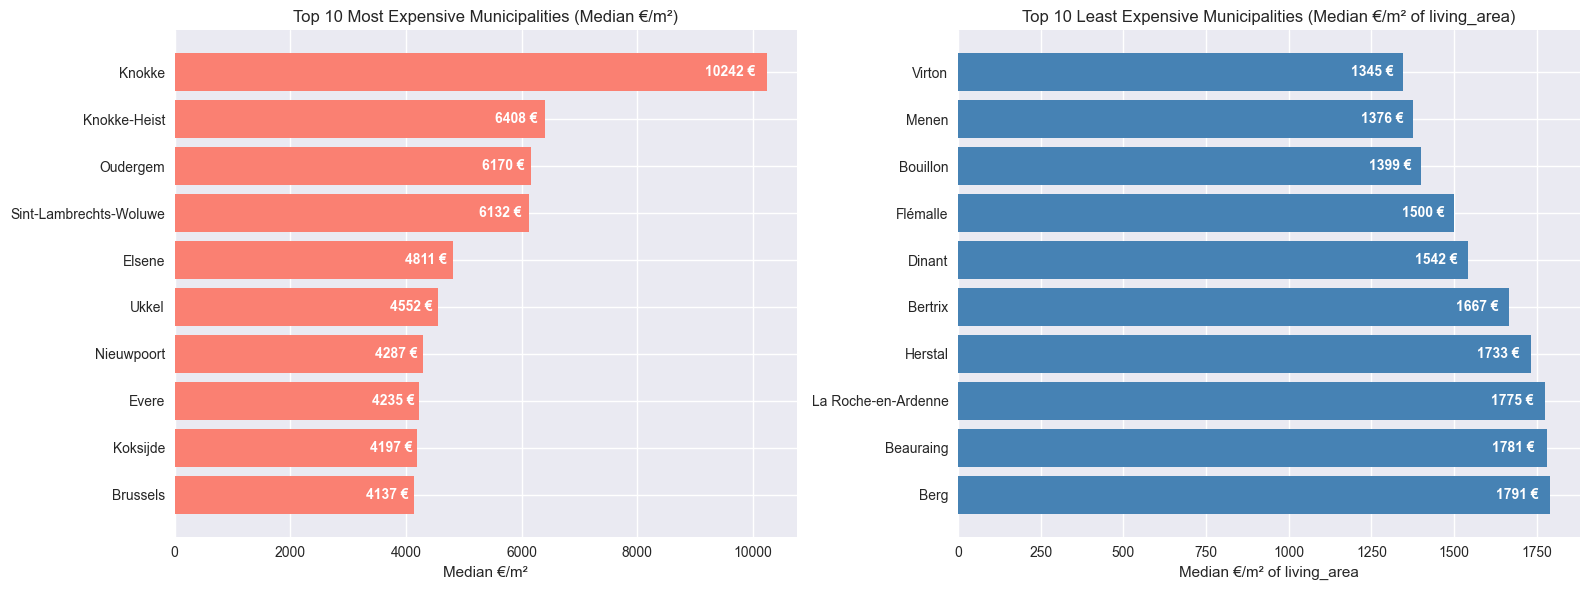

In [357]:

# Compute municipality-level stats
municipality_stats = (
    df_clean.groupby("locality_name")
    .agg(
        n=("price", "count"),
        median_price_m2=("price_per_m2", "median")
    )
    .query("n >= 20")        # keep only municipalities with sufficient data
    .dropna(subset=["median_price_m2"])
)

# Top 10 most expensive
top10 = municipality_stats.sort_values("median_price_m2", ascending=False).head(10)

# Bottom 10 least expensive
bottom10 = municipality_stats.sort_values("median_price_m2", ascending=True).head(10)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# -------------------------
# LEFT: TOP 10 MOST EXPENSIVE
# -------------------------
ax = axes[0]
values = top10["median_price_m2"]
labels = top10.index

bars = ax.barh(labels, values, color="salmon")
ax.set_title("Top 10 Most Expensive Municipalities (Median €/m²)")
ax.set_xlabel("Median €/m²")
ax.invert_yaxis()

# Add value labels inside bars
for bar, val in zip(bars, values):
    width = bar.get_width()
    ax.text(
        width * 0.98,
        bar.get_y() + bar.get_height() / 2,
        f"{val:.0f} €",
        ha="right", va="center", color="white", fontsize=10, fontweight="bold"
    )

# -------------------------
# RIGHT: BOTTOM 10 LEAST EXPENSIVE
# -------------------------
ax = axes[1]
values = bottom10["median_price_m2"]
labels = bottom10.index

bars = ax.barh(labels, values, color="steelblue")
ax.set_title("Top 10 Least Expensive Municipalities (Median €/m² of living_area)")
ax.set_xlabel("Median €/m² of living_area")
ax.invert_yaxis()

# Add value labels inside bars
for bar, val in zip(bars, values):
    width = bar.get_width()
    ax.text(
        width * 0.98,
        bar.get_y() + bar.get_height() / 2,
        f"{val:.0f} €",
        ha="right", va="center", color="white", fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.show()


## by provinces and region

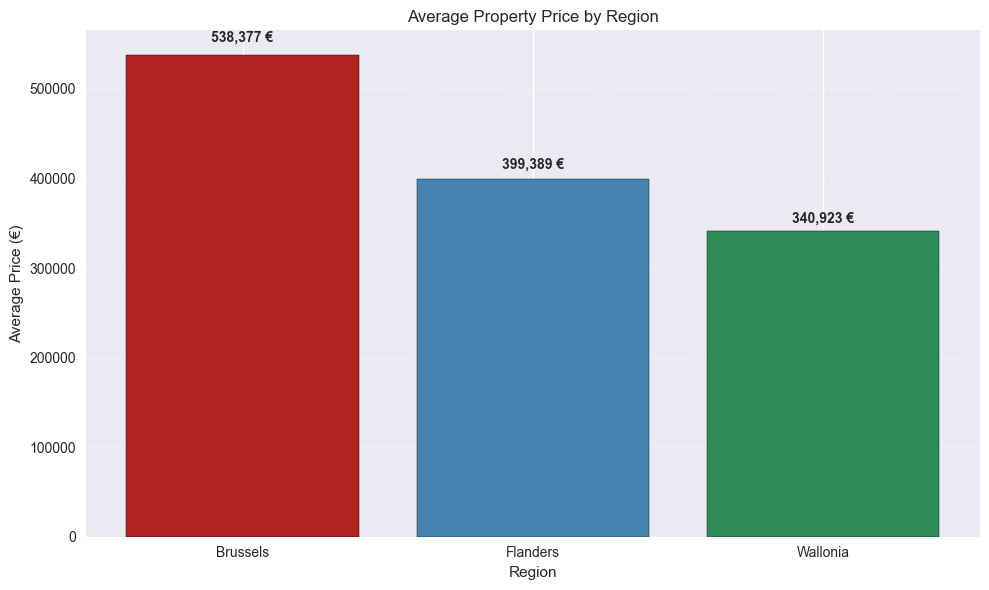

In [358]:


# Custom color map for the 3 regions
import pandas as pd
import matplotlib.pyplot as plt

# Custom color map
region_colors = {
    "Flanders": "steelblue",
    "Wallonia": "seagreen",
    "Brussels": "firebrick"
}

# Compute average price per region
avg_price_region = (
    df_clean.groupby("region")["price"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

# Extract colors in the order of the index
colors = [region_colors[r] for r in avg_price_region.index]

plt.figure(figsize=(10, 6))
ax = plt.bar(avg_price_region.index, avg_price_region.values, color=colors, edgecolor="black")

plt.title("Average Property Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price (€)")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Add value labels
for i, value in enumerate(avg_price_region.values):
    plt.text(
        i,
        value * 1.02,
        f"{value:,.0f} €",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


In [359]:
#
stats_be = region_stats(df_clean)
print(stats_be)



                n     mean_price  median_price  mean_price_m2  median_price_m2
locality_name                                                                 
Aalst          81  396786.333333      353000.0    2831.432998      3085.271318
Aalter         21  288437.476190      320000.0    2798.185402      2656.048676
Aarschot       20  359910.700000      340500.0    2781.370112      3129.839149
Andenne        43  295134.418605      295000.0    2015.375665      1870.248538
Anderlecht     70  334929.285714      279000.0    3207.030979      2855.952381
...            ..            ...           ...            ...              ...
Zandhoven      41  363286.073171      362000.0    3739.698516      3613.139825
Zedelgem       29  354620.689655      350000.0    3831.674412      3926.470588
Zonhoven       32  402819.281250      415360.0    2465.428985      2362.025000
Zottegem       21  370135.714286      379000.0    1971.685481      2104.066986
Éghezée        38  349842.105263      399500.0    23

## Price vs living area (scatterplot, log scales)


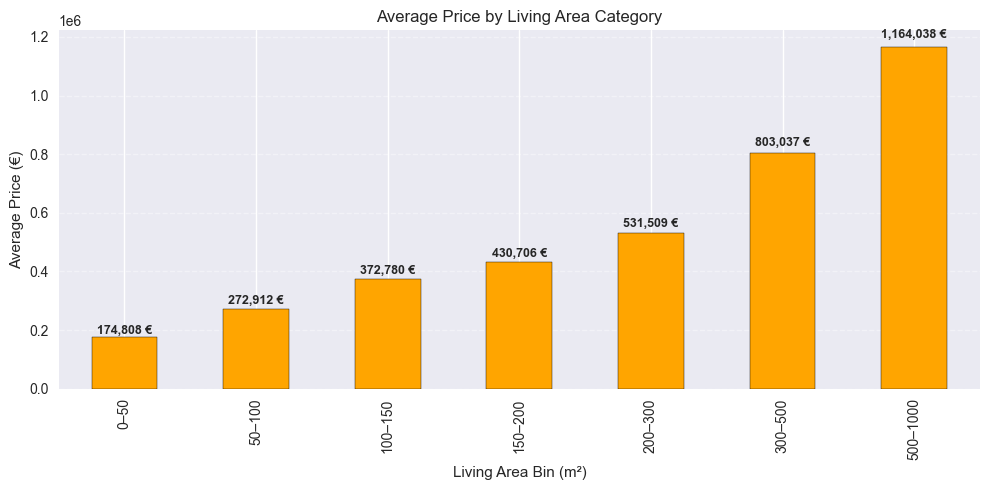

In [361]:

if "living_area" in df_clean.columns and "price" in df_clean.columns:

    bins = [0, 50, 100, 150, 200, 300, 500, 1000]
    labels = ["0–50", "50–100", "100–150", "150–200",
              "200–300", "300–500", "500–1000"]

    df_clean["living_area"] = pd.to_numeric(df_clean["living_area"], errors="coerce")
    df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")

    df_clean["living_area_bin"] = pd.cut(df_clean["living_area"], bins=bins, labels=labels)

    # FIX APPLIED
    price_per_bin = (
        df_clean.groupby("living_area_bin", observed=False)["price"]
        .mean()
        .reindex(labels)
        .dropna()
    )

    plt.figure(figsize=(10,5))
    ax = price_per_bin.plot(kind="bar", color="orange", edgecolor="black")

    plt.title("Average Price by Living Area Category")
    plt.xlabel("Living Area Bin (m²)")
    plt.ylabel("Average Price (€)")
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    for i, value in enumerate(price_per_bin.values):
        ax.text(
            i, 
            value * 1.02,
            f"{value:,.0f} €",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()


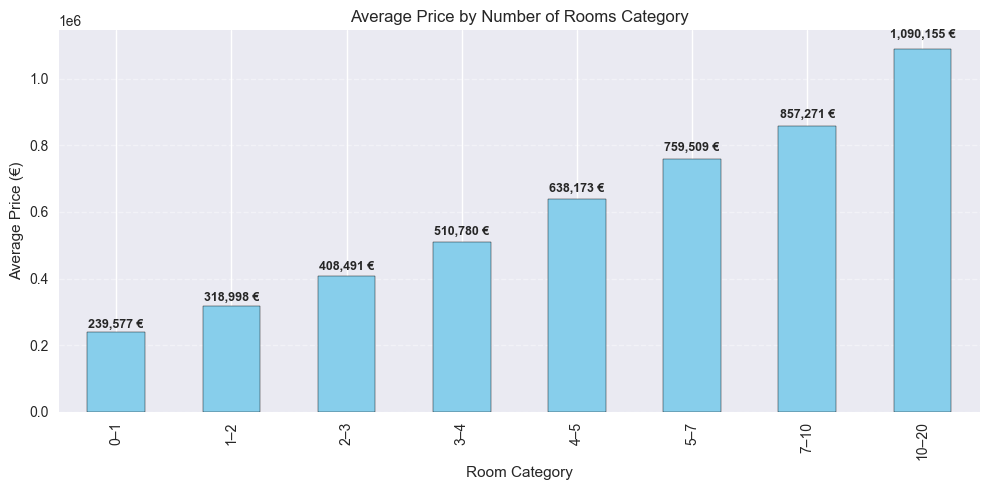

In [362]:


# Ensure required columns exist
if "number_rooms" in df_clean.columns and "price" in df_clean.columns:

    # Convert to numeric safely
    df_clean["number_rooms"] = pd.to_numeric(df_clean["number_rooms"], errors="coerce")
    df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")

    # Define bins for number of rooms
    bins = [0, 1, 2, 3, 4, 5, 7, 10, 20]
    labels = ["0–1", "1–2", "2–3", "3–4", "4–5", "5–7", "7–10", "10–20"]

    # Create binned room categories
    df_clean["room_bin"] = pd.cut(df_clean["number_rooms"], bins=bins, labels=labels)

    # Compute average price per room bin
    price_per_room_bin = (
        df_clean.groupby("room_bin", observed=False)["price"]
        .mean()
        .reindex(labels)
        .dropna()
    )

    # ------------------------------
    # PLOT: Average Price by Number of Rooms Category
    # ------------------------------
    plt.figure(figsize=(10,5))
    ax = price_per_room_bin.plot(kind="bar", color="skyblue", edgecolor="black")

    plt.title("Average Price by Number of Rooms Category")
    plt.xlabel("Room Category")
    plt.ylabel("Average Price (€)")
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    # Add labels on bars
    for i, value in enumerate(price_per_room_bin.values):
        ax.text(
            i,
            value * 1.02,
            f"{value:,.0f} €",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()


## properties according to their price bins

price_range
20k-30k         7
30k-50k        25
50k–100k      200
100k–200k    1651
200k–300k    4176
300k-400k    3818
400k-500k    2119
500k–1M      2022
>1M           355
Name: count, dtype: int64


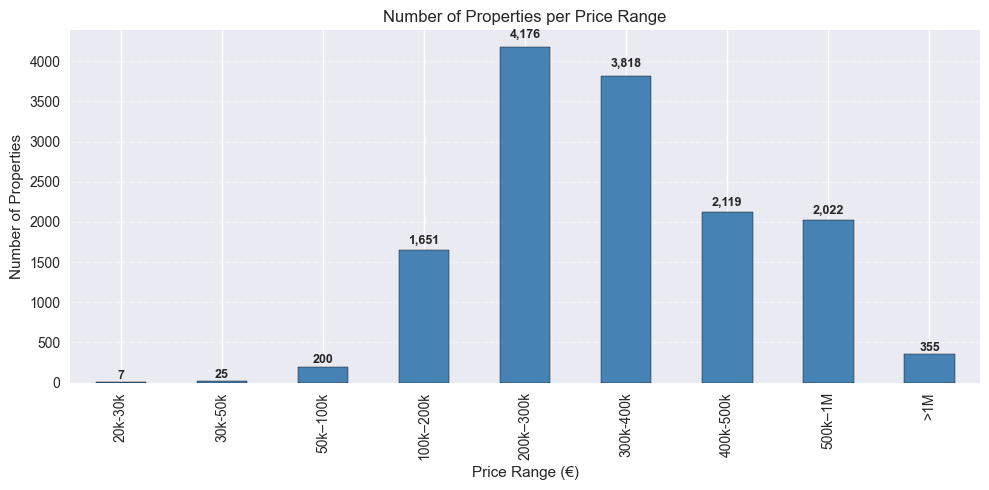

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure price is numeric
df_clean["price"] = pd.to_numeric(df_clean["price"], errors="coerce")

# Define your price bins
bins = [20000,30000,50000, 100000, 200000,300000,400000, 500000, 1000000, float("inf")]
labels = [
    
    "20k-30k",
    "30k-50k",
    "50k–100k",
    "100k–200k",
    "200k–300k",
    "300k-400k",
    "400k-500k",
    "500k–1M",
    ">1M"
]

# Categorize prices into these bins
df_clean["price_range"] = pd.cut(df_clean["price"], bins=bins, labels=labels)

# Count how many properties fall in each price range
price_counts = df_clean["price_range"].value_counts().sort_index()

print(price_counts)

plt.figure(figsize=(10,5))
ax = price_counts.plot(kind="bar", color="steelblue", edgecolor="black")

plt.title("Number of Properties per Price Range")
plt.xlabel("Price Range (€)")
plt.ylabel("Number of Properties")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Add numbers on top of each bar
for i, value in enumerate(price_counts.values):
    plt.text(
        i, value * 1.02,
        f"{value:,}", 
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()



# property type

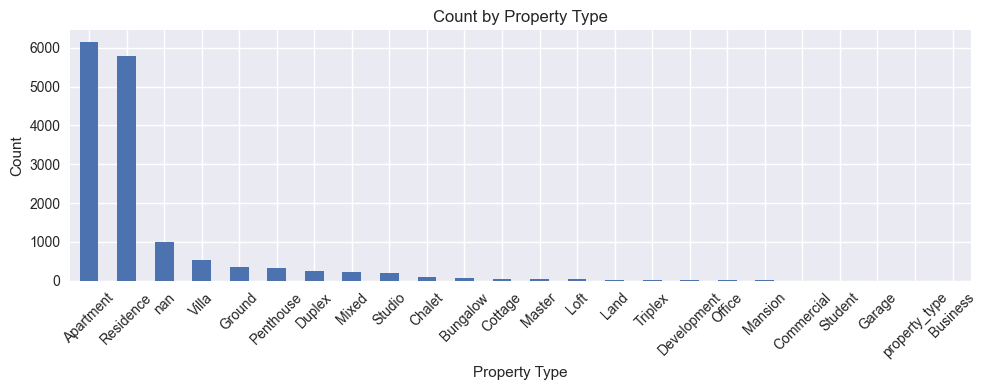

In [365]:
if "property_type" in df_analysis.columns:
    plt.figure(figsize=(10,4))
    df_analysis["property_type"].value_counts().plot(kind="bar")
    plt.title("Count by Property Type")
    plt.ylabel("Count")
    plt.xlabel("Property Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Price vs type of properties

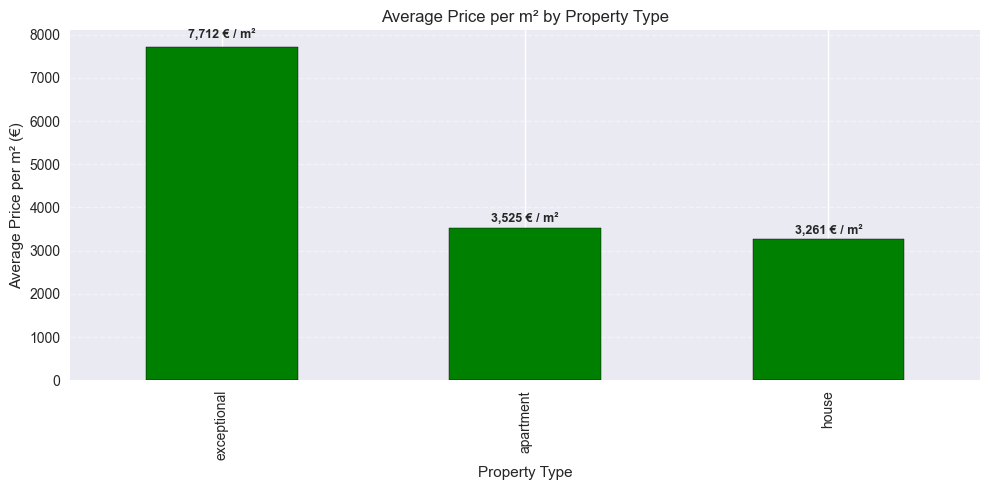

In [367]:


# Ensure required columns exist
if "property_type_name" in df_clean.columns and "price_per_m2" in df_clean.columns:

    # Clean property type values
    df_clean["property_type_name"] = (
        df_clean["property_type_name"]
        .astype("string")
        .str.strip()
    )

    # Convert price_per_m2 to numeric just in case
    df_clean["price_per_m2"] = pd.to_numeric(df_clean["price_per_m2"], errors="coerce")

    # Compute average price per m2 per property type
    avg_ppm2_per_type = (
        df_clean.groupby("property_type_name", observed=False)["price_per_m2"]
        .mean()
        .dropna()
        .sort_values(ascending=False)
    )

    # ------------------------------
    # PLOT: Average Price per m² by Type
    # ------------------------------
    plt.figure(figsize=(10,5))
    ax = avg_ppm2_per_type.plot(kind="bar", color="green", edgecolor="black")

    plt.title("Average Price per m² by Property Type")
    plt.xlabel("Property Type")
    plt.ylabel("Average Price per m² (€)")
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    # Add labels on bars
    for i, value in enumerate(avg_ppm2_per_type.values):
        ax.text(
            i,
            value * 1.02,
            f"{value:,.0f} € / m²",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()


## Price by state of property

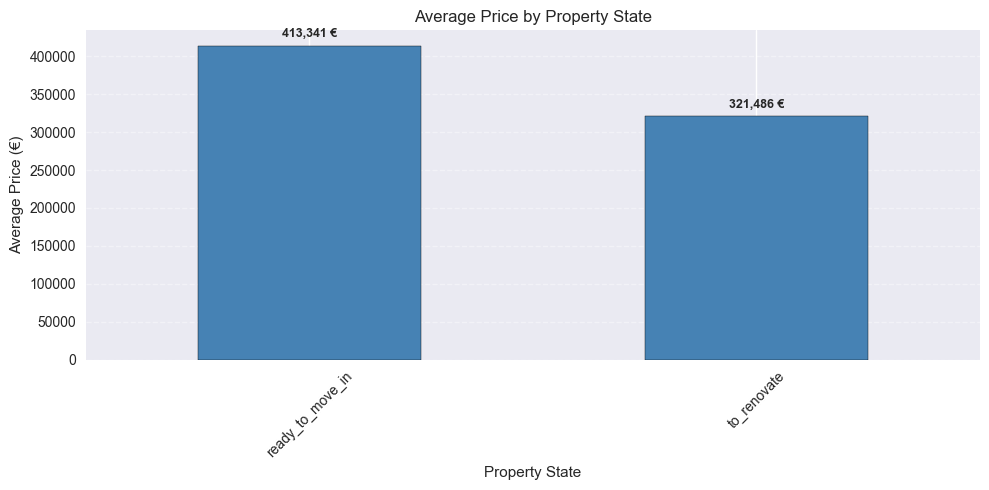

In [369]:


# Compute average price per state
avg_price_state = (
    df_clean.groupby("state_mapped", observed=False)["price"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
ax = avg_price_state.plot(kind="bar", color="steelblue", edgecolor="black")

plt.title("Average Price by Property State")
plt.xlabel("Property State")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Add value labels
for i, value in enumerate(avg_price_state.values):
    ax.text(
        i,
        value * 1.02,
        f"{value:,.0f} €",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()



## Province-level aggregated stats 

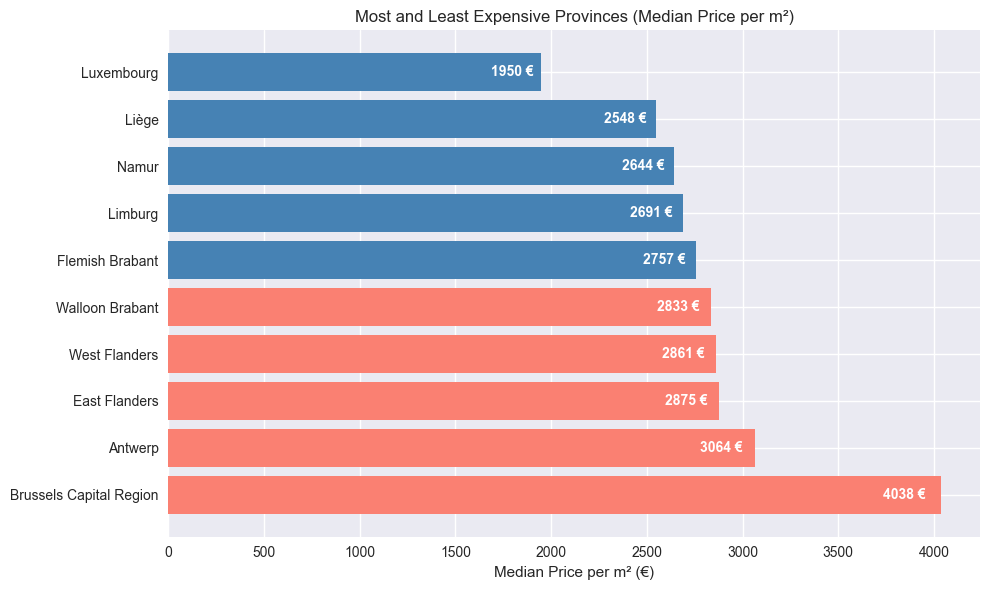

In [372]:


# Compute median price per m² per province
province_ppm2 = (
    df_clean.groupby("province")["price_per_m2"]
    .median()
    .dropna()
    .sort_values()
)

# Bottom 5 (cheapest)
bottom5 = province_ppm2.head(5)

# Top 5 (most expensive)
top5 = province_ppm2.tail(5)

# Combine them into one DataFrame for plotting
combined = pd.concat([bottom5, top5])

# Assign colors: one for cheap, one for expensive
colors = ["steelblue"] * 5 + ["salmon"] * 5

plt.figure(figsize=(10, 6))
bars = plt.barh(combined.index, combined.values, color=colors)

plt.title("Most and Least Expensive Provinces (Median Price per m²)")
plt.xlabel("Median Price per m² (€)")

# Invert so highest appears at top visually
plt.gca().invert_yaxis()

# Add labels inside bars
for bar, value in zip(bars, combined.values):
    plt.text(
        value * 0.98, 
        bar.get_y() + bar.get_height()/2,
        f"{value:.0f} €",
        ha="right", va="center",
        fontsize=10, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

